# Tensorflow Tutorial 05


参考文献
- [301_simple_regression.py](https://github.com/MorvanZhou/Tensorflow-Tutorial/blob/master/tutorial-contents/301_simple_regression.py)

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [0]:
tf.set_random_seed(1)
np.random.seed(1)

In [0]:
# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis] # shape(100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise # 2次関数

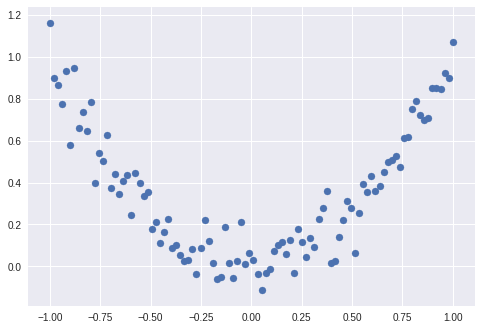

In [22]:
# plot data
plt.scatter(x, y)
plt.show()

In [0]:
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.float32, y.shape)

In [0]:
# neural network layers
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu) # hidden layer
output = tf.layers.dense(l1, 1) # output layer

In [0]:
loss = tf.losses.mean_squared_error(tf_y, output)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train_op = optimizer.minimize(loss)

In [0]:
sess = tf.Session() # Control training and others
sess.run(tf.global_variables_initializer())  # initalize var in graph

In [0]:
plt.ion()

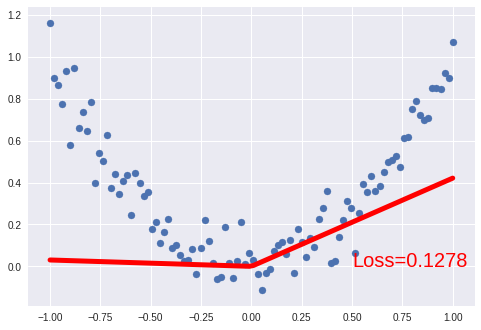

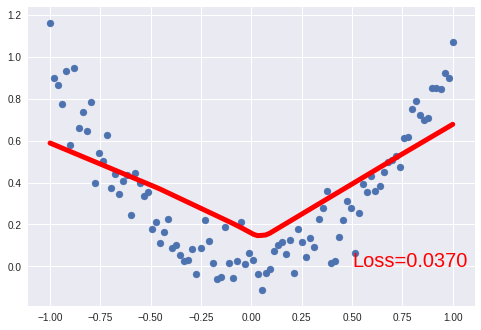

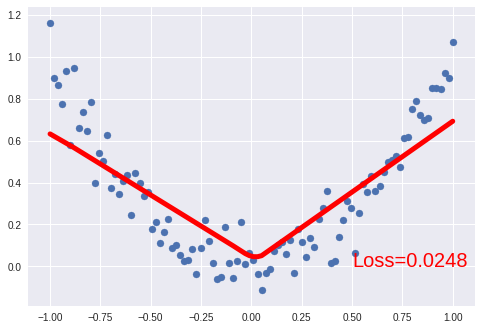

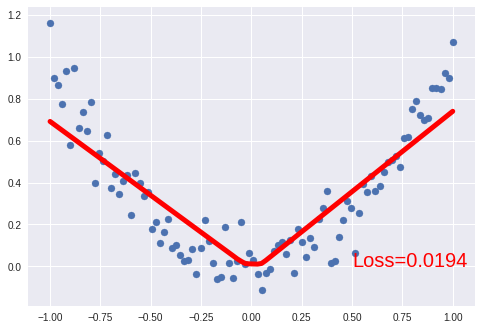

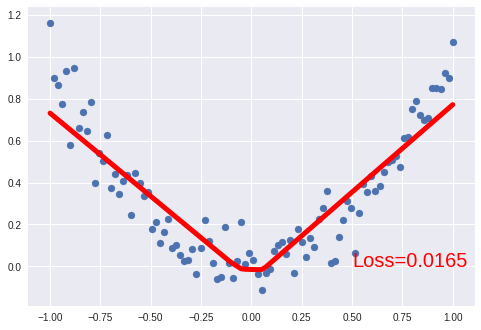

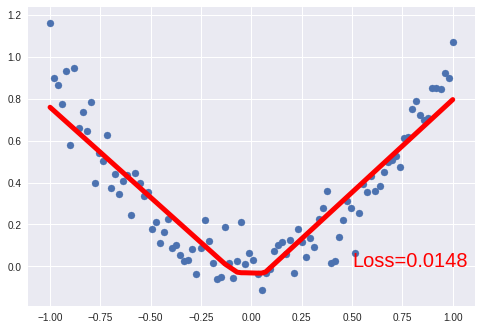

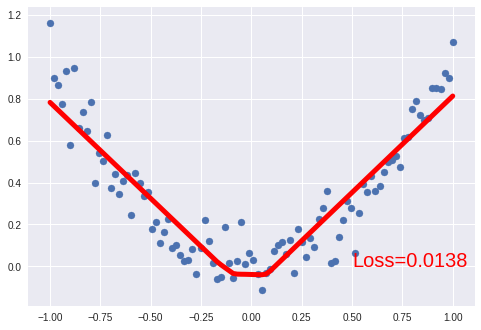

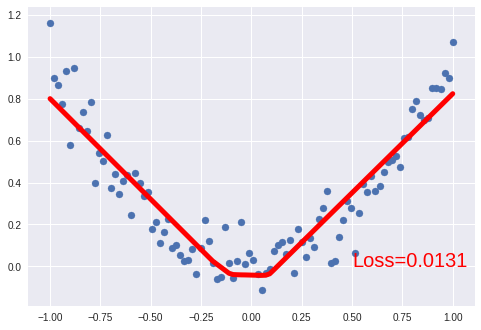

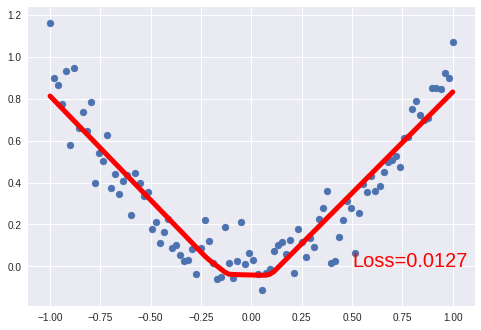

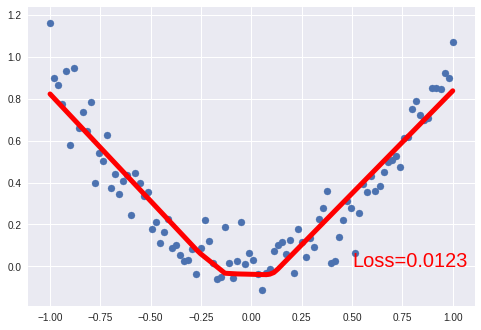

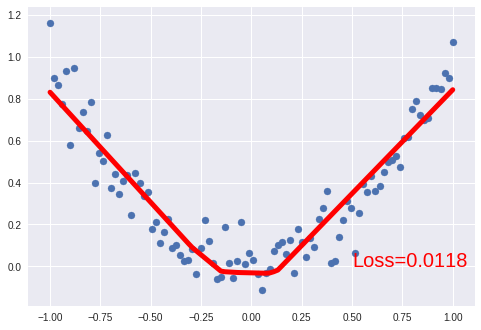

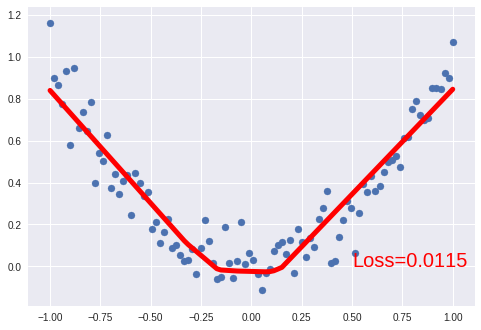

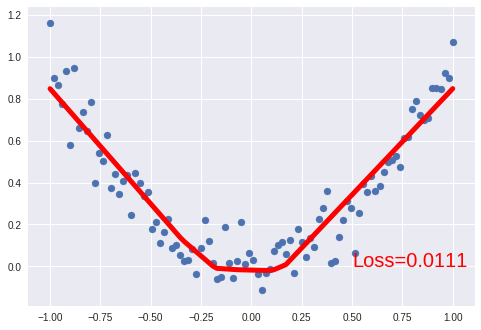

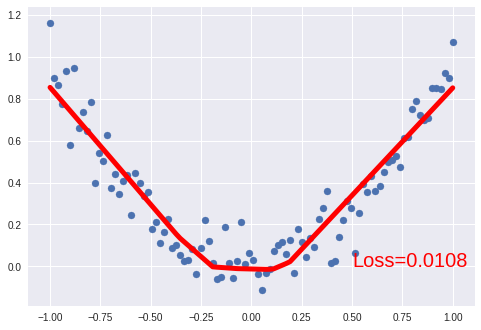

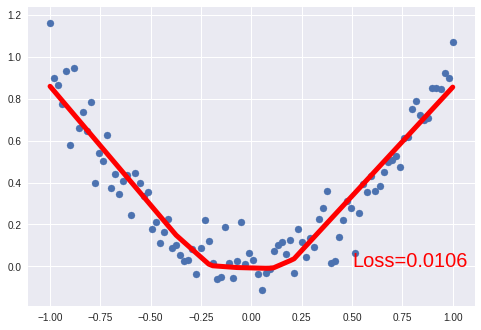

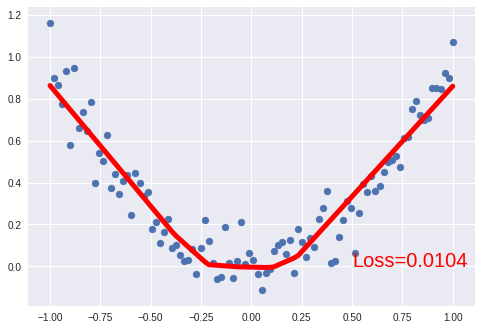

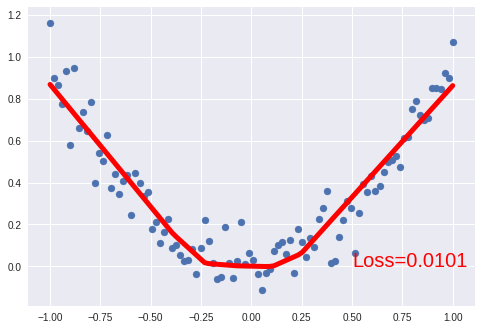

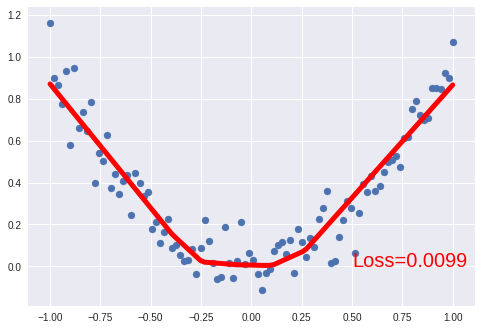

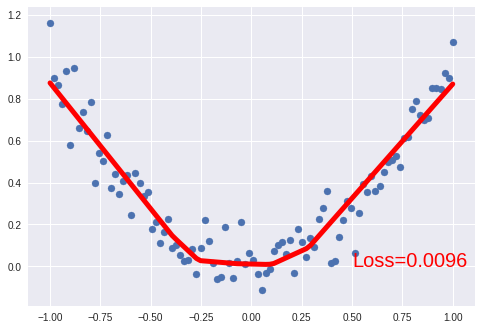

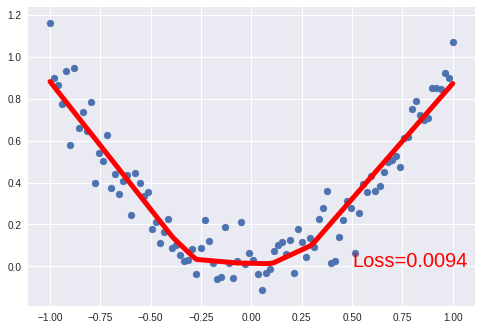

In [41]:
#from IPython import display
#import time
for step in range(100):
  # train and net output
  _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
  
  if step%5 == 0:
    # plot and shoe learning process
    plt.cla()
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size':20, 'color': 'red'})
    plt.pause(0.01)
    #plt.draw()
    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    #time.sleep(1)

    
plt.ioff()
plt.show()